# Returning a variable for a speficic location

This example demonstrates extracting the subsurface storage for a location in Lille, Belgium for the 15 layers and following by the calculation the monthly total subsurface storage (tss) for the year 2022. The data will be extracted for one location.  
Latitude: 51.21998  
Longitude: 4.83778 

After extracting the data, the results are plotted.

First, we have to make the tool available to import by Python. If you already have added it to your PYHTONPATH, below step is not needed.

In [64]:
import os
import sys

cwd = os.getcwd()
tool_path = f"{cwd}/ParFlow_data_extraction_tool"
sys.path.append(tool_path)


After that, we need to import all libraries needed in the example.

In [65]:
import matplotlib.pyplot as plt
import datetime
import calendar
import data_extraction_tool

Before running the tool we have to read in some data that we can apply the data extraction. For this example we take some data available in ../data/ directory. In particular, data_input_example_2.json and DE-0055_INDICATOR_regridded_rescaled_SoilGrids250-v2017_BGRvector_newAllv.nc 

In [66]:
data_input = f'{tool_path}/examples/data_input_example_2.json'
lls_indicators = f'{tool_path}/data/DE-0055_INDICATOR_regridded_rescaled_SoilGrids250-v2017_BGRvector_newAllv.nc'

After that we extract the data by choosing the function data_extraction_variable() from the tool.

In [ ]:
sss_2022 = data_extraction_tool.data_extraction_variable(data_input,lls_indicators)

Found:
Mapped x index: 477
Mapped y index: 1194


The data extracted is for the location in Lille for the 15 layers

In [29]:
sss_2022.shape

(365, 15)

Next we calculate the total subsurface storage by summing across the layers' axis

In [57]:
tss_monthly_list = []
for mm in range(12):
    #extract the indices for each month to calculate monthly tss
    bMonthDate  = datetime.datetime(2022,mm+1,1)
    daysInMonth = calendar.monthrange(bMonthDate.year, bMonthDate.month)[1]
    bMonth = int(bMonthDate.strftime('%j'))-1
    eMonth = bMonth + daysInMonth
    # calculate the total subsurface storage for each month and convert from m to mm
    tss_sum = np.sum(sss_2022[bMonth:eMonth], axis = 1)* 1000
    tss_month = np.mean(tss_sum,axis=0) # calculate the mean monthly tss
    tss_monthly_list.append(tss_month) #added to a list in order 

After extracting the time series, the results are plotted.


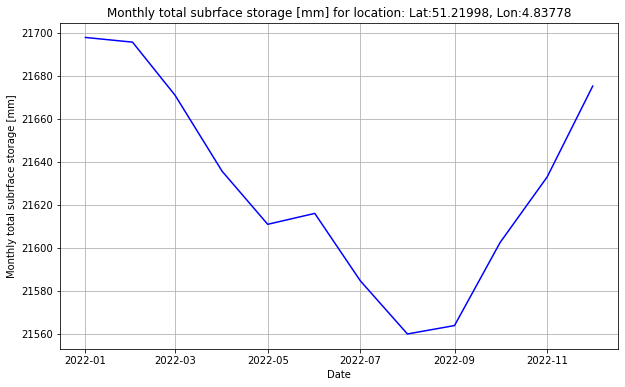

In [63]:
# Plotting the time series

start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2022, 12, 31)
date_range = np.arange(start_date, end_date + datetime.timedelta(days=1), dtype='datetime64[M]')

plt.figure(figsize=(10, 6))
plt.plot(date_range,tss_monthly_list, color='b', linestyle='-')
plt.title('Monthly total subrface storage [mm] for location: Lat:51.21998, Lon:4.83778')
plt.xlabel('Date')
plt.ylabel('Monthly total subrface storage [mm]')
plt.grid(True)
plt.show()